<a href="https://colab.research.google.com/github/PSheva/neural-networks/blob/main/NN_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as rf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(train_x, train_y),(test_x, test_y)=keras.datasets.mnist.load_data()
train_x, test_x = train_x/255, test_x/255

In [ ]:
train_x.shape[0]
# train_x_flattened = np.reshape(train_x,(train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
# test_x_flattened = np.reshape(test_x,(test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

60000

In [ ]:
def compile_model(model):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
def build_plot(fitted_model):
  plt.plot(fitted_model.history['loss'], label='Training loss')
  plt.plot(fitted_model.history['val_loss'], label='Validation loss')
  plt.xlabel=['Epochs']
  plt.ylabel=['Loss']
  plt.legend()
  plt.show()

In [ ]:
model = keras.Sequential(
    layers = [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])
model.summary()
compile_model(model)

fitted_model = model.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                39250     
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3131 - accuracy: 0.9132 - val_loss: 0.1894 - val_accuracy: 0.9462
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1553 - accuracy: 0.9549 - val_loss: 0.1305 - val_accuracy: 0.9616
Epoch 3/5
1875/1875 [======

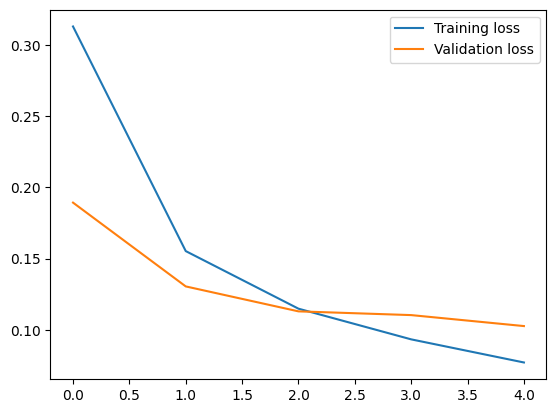

In [ ]:
build_plot(fitted_model)

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9687


[0.10263562202453613, 0.9686999917030334]

In [ ]:
num_predictions = 10
obj_indexes = np.random.choice(test_x.shape[0], num_predictions, replace=False)
prediction = model.predict(test_x[obj_indexes])
print(obj_indexes)

1/1 [==============================] - 0s 66ms/step
[1262 1107 5303  936 8820 6890 3231 2932 8164 9159]


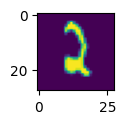

Real value: 2, Predicted value: 2


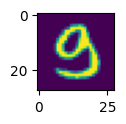

Real value: 9, Predicted value: 9


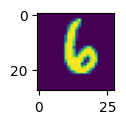

Real value: 6, Predicted value: 6


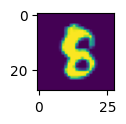

Real value: 8, Predicted value: 8


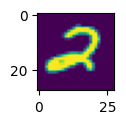

Real value: 2, Predicted value: 2


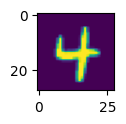

Real value: 4, Predicted value: 4


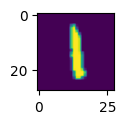

Real value: 1, Predicted value: 1


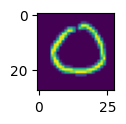

Real value: 0, Predicted value: 0


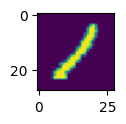

Real value: 1, Predicted value: 1


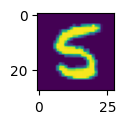

Real value: 5, Predicted value: 5


In [ ]:
for i in range(num_predictions):
    plt.figure(figsize=(1,1))
    plt.imshow(test_x[obj_indexes[i]])
    plt.show()
    print(f'Real value: {test_y[obj_indexes[i]]}, Predicted value: {np.argmax(prediction[i])}')
